# Make plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# Add ids and comment out others when using
princeton_id = 'aa8417'
#princeton_id = 'ns5404'
#princeton_id = 'jf...'

project_dir = f'/scratch/gpfs/{princeton_id}/QCB557_project'

model_name = 'fine_tune_full_v0'
model_out_dir = f'{project_dir}/models/{model_name}'

In [26]:
log_df

,loss,learning_rate,epoch,step,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,0.6918,9.856938e-06,1.07,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.07,500,0.691650,0.525966,0.532878,0.845978,0.653880,8.0022,413.887,51.736,NaN,NaN,NaN,NaN,NaN
2,0.6891,9.713877e-06,2.15,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.15,1000,0.690369,0.528986,0.532220,0.909298,0.671441,5.2853,626.642,78.330,NaN,NaN,NaN,NaN,NaN
4,0.6869,9.570815e-06,3.22,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.6667,2.755365e-07,72.96,34000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,NaN,NaN,72.96,34000,0.676421,0.576691,0.568261,0.833428,0.675763,5.3513,618.919,77.365,NaN,NaN,NaN,NaN,NaN
136,0.6660,1.327611e-07,74.03,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,NaN,NaN,74.03,34500,0.676415,0.576691,0.568261,0.833428,0.675763,5.2705,628.407,78.551,NaN,NaN,NaN,NaN,NaN


### Training and validation loss curves

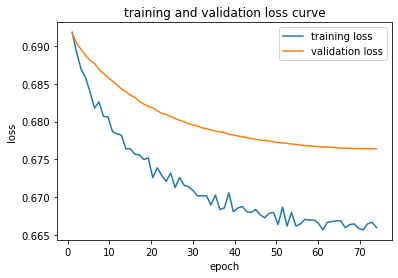

In [25]:
# read the log
log_df = pd.read_csv(f'{project_dir}/model_output/log_{model_name}.csv')

# plot the loss curve
epoch = log_df['epoch'].unique()[:-1]
train = log_df['loss'].dropna()
validation = log_df['eval_loss'].dropna()

plt.plot(epoch, train, label='training loss')
plt.plot(epoch, validation, label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('training and validation loss curve')

plt.legend()
plt.show()

### Validation accuracy

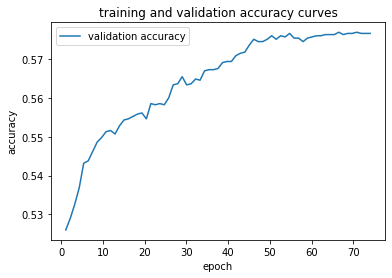

In [27]:
# plot the accuracy curve

valid_acc = log_df['eval_accuracy'].dropna()

plt.plot(epoch, valid_acc, label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('training and validation accuracy curves')

plt.legend()
plt.show()

### Validaton precision and recall

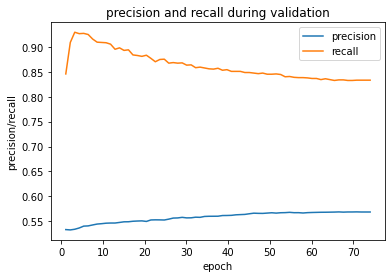

In [30]:
# plot other metrics
valid_prec = log_df['eval_precision'].dropna()
valid_rec = log_df['eval_recall'].dropna()

plt.plot(epoch, valid_prec, label='precision')
plt.plot(epoch, valid_rec, label='recall')
plt.xlabel('epoch')
plt.ylabel('precision/recall')
plt.title('precision and recall during validation')

plt.legend()
plt.show()